In [1]:
#載入套件
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
#匯入資料（但所有變數名稱皆是隱藏，但需要預測最後TARGET CLASS是哪個）
#index_col=0代表設定第一行為index
df = pd.read_csv('data/Classified Data', index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [9]:
#由於KNN分類法是藉由確認最近的觀察值來預測分類，因此變數的比例就會影響很大
#載入標準化比例尺(StandardScaler)套件，只將所有`特徵值`做標準化
from sklearn.preprocessing import StandardScaler

feature_df = df.drop(["TARGET CLASS"], axis=1)
# scaled_feature is a nd-array
scaled_feature = StandardScaler().fit_transform(feature_df)
target = df["TARGET CLASS"].values
scaled_feature_df = pd.DataFrame(scaled_feature, 
                                 index=feature_df.index, 
                                 columns=feature_df.columns)
print(scaled_feature_df.head())

        WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375 -0.798951   
1 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706 -1.129797   
2 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156  2.599818   
3  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220  1.750208   
4  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773  0.596782   

        PJF       HQE       NXJ  
0 -1.482368 -0.949719 -0.643314  
1 -0.202240 -1.828051  0.636759  
2  0.285707 -0.682494 -0.377850  
3  1.066491  1.241325 -1.026987  
4 -1.472352  1.040772  0.276510  
[1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0
 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0
 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 

In [11]:
#將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = \
     train_test_split(scaled_feature, target,
                      test_size = 0.3,random_state=101)

In [13]:
#使用KNN演算法
from sklearn.neighbors import KNeighborsClassifier

#從k=1開始測試
model = KNeighborsClassifier(n_neighbors=1, p=2, weights="distance", algorithm="brute")
model.fit(x_train,y_train)
predition = model.predict(x_test)

In [14]:
#測試KNN演算法的好壞
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predition))

[[151   8]
 [ 15 126]]


In [15]:
print(classification_report(y_test,predition))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [33]:
#剛剛只先用了k=1來建立模型，現在利用for來建立迴圈(選擇不同k值)，並紀錄錯誤率
error_rate = []

for k in range(1, 60):
    model = KNeighborsClassifier(n_neighbors=k, p=2, weights="distance", algorithm="brute")
    model.fit(x_train,y_train)
    predition = model.predict(x_test)
    error = np.mean(predition!=y_test)
    error_rate.append(error)

Text(0, 0.5, 'Error Rate')

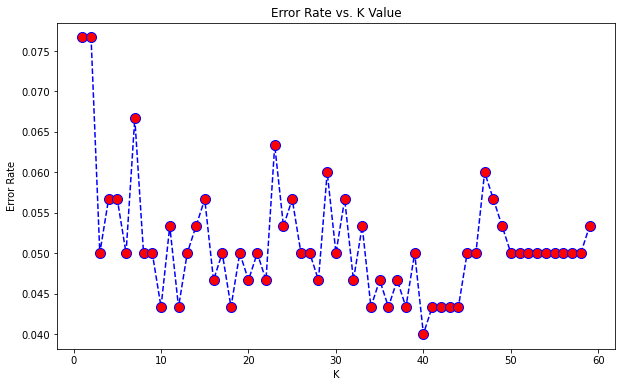

In [29]:
#將k=1~60的錯誤率製圖畫出。k=23之後，錯誤率就在5-6%之間震盪。
plt.figure(figsize=(10, 6))
plt.plot(range(1, 60), error_rate, 
         color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [31]:
#跟一開始k=1做比較
model = KNeighborsClassifier(n_neighbors=1, p=2, weights="distance", algorithm="brute")

model.fit(x_train,y_train)
prediction = model.predict(x_test)

print('With k=1')
print('\n')
print(confusion_matrix(y_test,prediction))
print('\n')
print(classification_report(y_test,prediction))

With k=1


[[151   8]
 [ 15 126]]


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [34]:
#選擇錯誤率最低的K=40來看precision、recall、f1-score、support表現
model = KNeighborsClassifier(n_neighbors=40, p=2, weights="distance", algorithm="brute")

model.fit(x_train,y_train)
prediction = model.predict(x_test)

print('With k=40')
print('\n')
print(confusion_matrix(y_test,prediction))
print('\n')
print(classification_report(y_test,prediction))



With k=40


[[154   5]
 [  7 134]]


              precision    recall  f1-score   support

           0       0.96      0.97      0.96       159
           1       0.96      0.95      0.96       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

